# FashionNet Data training

## Code

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
import h5py
from PIL import Image
import operator
import matplotlib.pyplot as plt
import time, pickle, pandas
import numpy as np
import tensorflow.keras
from PIL import Image
import glob
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D ,Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import Input
from keras.applications import VGG16
from keras import backend
from keras import optimizers
from tensorflow.keras import applications
from keras.utils.conv_utils import convert_kernel

%matplotlib inline

Using TensorFlow backend.


In [3]:
import tensorflow as tf
config = tf.ConfigProto()

config.gpu_options.allow_growth = True

sess = tf.Session(config=config)

In [4]:
nb_classes = 5
class_name = {
    
    0: 'Checked',
    1: 'Floral',
    2: 'Graphic',
    3: 'Plain',
    4: 'Striped'
    
}

In [5]:
def show_sample(X, y, prediction=-1):
    im = X
    plt.imshow(im)
    if prediction >= 0:
        plt.title("Class = %s, Predict = %s" % (class_name[y], class_name[prediction]))
    else:
        plt.title("Class = %s" % (class_name[y]))

    plt.axis('on')
    plt.show()

In [6]:
img_width, img_height = 150, 150

train_data_dir = './Classification/pattern/train'
validation_data_dir = './Classification/pattern/val'

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255        
        )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=5,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=5,
        class_mode='categorical')

Found 7079 images belonging to 5 classes.
Found 1814 images belonging to 5 classes.


In [8]:
nb_train_samples = 7079
nb_validation_samples = 1814

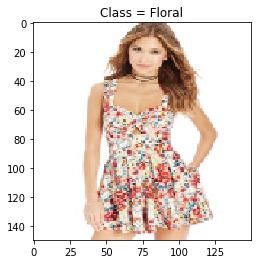

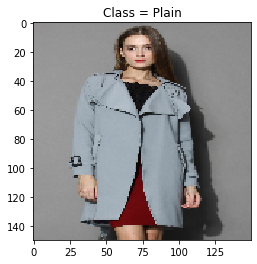

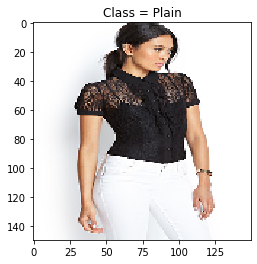

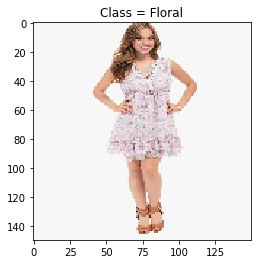

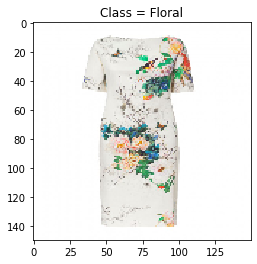

In [9]:
import PIL
from PIL import Image
from IPython.display import display


for X_batch, Y_batch in train_generator:
    for i in range(5):
        show_sample(X_batch[i, :, :, :], np.argmax(Y_batch[i]))
    break

In [10]:
def build_vgg16(framework='tf'):
    
    backend.set_image_dim_ordering('tf')
        
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height, 3)))
        
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    return model

weights_path = 'vgg16_weights.h5'

assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    
f.close()
print('Model loaded.')

tf_model = build_vgg16('tf')

top_model = Sequential()
print (Flatten(input_shape=tf_model.output_shape[1:]))
top_model.add(Flatten(input_shape=tf_model.output_shape[1:]))
top_model.add(Dense(512, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(5, activation='softmax'))
print (tf_model.summary())
print(top_model.summary())

Model loaded.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 152, 152, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 150, 150, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 152, 152, 64)      0         
_________________________________________________________________
conv1_2 (Conv2D)             (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
zero_pa

In [11]:
tf_model.add(top_model)

for layer in tf_model.layers[:-4]:
    layer.trainable = False
    
adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001)
tf_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'])


In [12]:
checkpoint_callback = ModelCheckpoint('./models/vgg_weights_frozen_pattern.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

tf_model.fit_generator(
        train_generator,
        samples_per_epoch = nb_train_samples,
        nb_epoch = 5,
        validation_data = validation_generator,
        nb_val_samples = nb_validation_samples,
        verbose = 1,
        initial_epoch = 0,
        callbacks=[checkpoint_callback]
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1415/1415 [==============================] - 95s 67ms/step - loss: 1.5701 - acc: 0.2691 - val_loss: 1.4993 - val_acc: 0.3792
Epoch 2/5
1415/1415 [==============================] - 91s 64ms/step - loss: 1.4581 - acc: 0.3590 - val_loss: 1.3904 - val_acc: 0.4274
Epoch 3/5
1415/1415 [==============================] - 90s 64ms/step - loss: 1.4005 - acc: 0.3977 - val_loss: 1.3508 - val_acc: 0.4586
Epoch 4/5
1415/1415 [==============================] - 89s 63ms/step - loss: 1.3755 - acc: 0.4188 - val_loss: 1.3345 - val_acc: 0.4699
Epoch 5/5
1415/1415 [==============================] - 90s 63ms/step - loss: 1.3577 - acc: 0.4302 - val_loss: 1.3118 - val_acc: 0.4760


In [13]:
accuracies = np.array([])
losses = np.array([])

i=0
for X_batch, Y_batch in validation_generator:
    loss, accuracy = tf_model.evaluate(X_batch, Y_batch, verbose=0)
    losses = np.append(losses, loss)
    accuracies = np.append(accuracies, accuracy)
    i += 1
    if i == 20:
        break
       
print("Validation: accuracy = %f  ;  loss = %f" % (np.mean(accuracies), np.mean(losses)))

Validation: accuracy = 0.552500  ;  loss = 1.235609


In [14]:

for layer in tf_model.layers[:-4]:
    layer.trainable = True
    
adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001)
tf_model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy'])

In [15]:
tf_model.load_weights('./models/vgg_weights_frozen_pattern.hdf5')

In [16]:
checkpoint_callback = ModelCheckpoint('./models/vgg_weights_best_pattern.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

tf_model.fit_generator(
        train_generator,
        samples_per_epoch = nb_train_samples,
        nb_epoch = 10,
        validation_data = validation_generator,
        nb_val_samples = nb_validation_samples,
        verbose = 1,
        initial_epoch = 5,
        callbacks=[checkpoint_callback]
)

Epoch 6/10
1415/1415 [==============================] - 120s 85ms/step - loss: 1.2517 - acc: 0.4911 - val_loss: 1.1701 - val_acc: 0.5552
Epoch 7/10
1415/1415 [==============================] - 118s 83ms/step - loss: 0.8875 - acc: 0.6836 - val_loss: 0.7916 - val_acc: 0.7259
Epoch 8/10
1415/1415 [==============================] - 118s 83ms/step - loss: 0.6964 - acc: 0.7648 - val_loss: 0.6537 - val_acc: 0.7724
Epoch 9/10
1415/1415 [==============================] - 118s 83ms/step - loss: 0.5928 - acc: 0.7956 - val_loss: 0.5655 - val_acc: 0.8020
Epoch 10/10
1415/1415 [==============================] - 118s 83ms/step - loss: 0.5252 - acc: 0.8217 - val_loss: 0.5512 - val_acc: 0.8192


In [17]:
accuracies = np.array([])
losses = np.array([])

i=0
for X_batch, Y_batch in validation_generator:
    loss, accuracy = tf_model.evaluate(X_batch, Y_batch, verbose=0)
    losses = np.append(losses, loss)
    accuracies = np.append(accuracies, accuracy)
    i += 1
    if i == 20:
        break

print("Validation: accuracy = %f  ;  loss = %f" % (np.mean(accuracies), np.mean(losses)))

Validation: accuracy = 0.780000  ;  loss = 0.618463


In [18]:
tf_model.fit_generator(
        train_generator,
        samples_per_epoch = nb_train_samples,
        nb_epoch = 13,
        validation_steps = 4000,
        validation_data = validation_generator,
        verbose = 1,
        initial_epoch = 10,
        callbacks=[checkpoint_callback]
)

Epoch 11/13
1415/1415 [==============================] - 179s 127ms/step - loss: 0.4689 - acc: 0.8459 - val_loss: 0.5864 - val_acc: 0.8061
Epoch 12/13
1415/1415 [==============================] - 180s 128ms/step - loss: 0.4149 - acc: 0.8628 - val_loss: 0.4860 - val_acc: 0.8420
Epoch 13/13
1415/1415 [==============================] - 181s 128ms/step - loss: 0.3891 - acc: 0.8731 - val_loss: 0.4670 - val_acc: 0.8459


The best model is saved in vgg_weights_best_pattern.hdf5. Just by changing the class names make other models for each classes.